# #002_ML

- 통계 : 이해와 설명, 
- 블랙박스 이슈 : 예측에 대한 설명이 없기 때문에 통계가 필요하다. 
<br> => X-AI : 설명 가능한 AI
- 종류
    1. 지도학습 (supervised) -> target을 가지고 있고, 수가 정해져있으면 분류, 무한하면 회귀
    2. 비지도학습 (unsupervised)
    3. 강화학습 (reinforcement)
- data로부터 specific한 문제해결을 위한 최적의 모델 만들기
<br> => 평가기준이 필요하다.

### - 분류 모델

In [1]:
import seaborn as sns

In [46]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


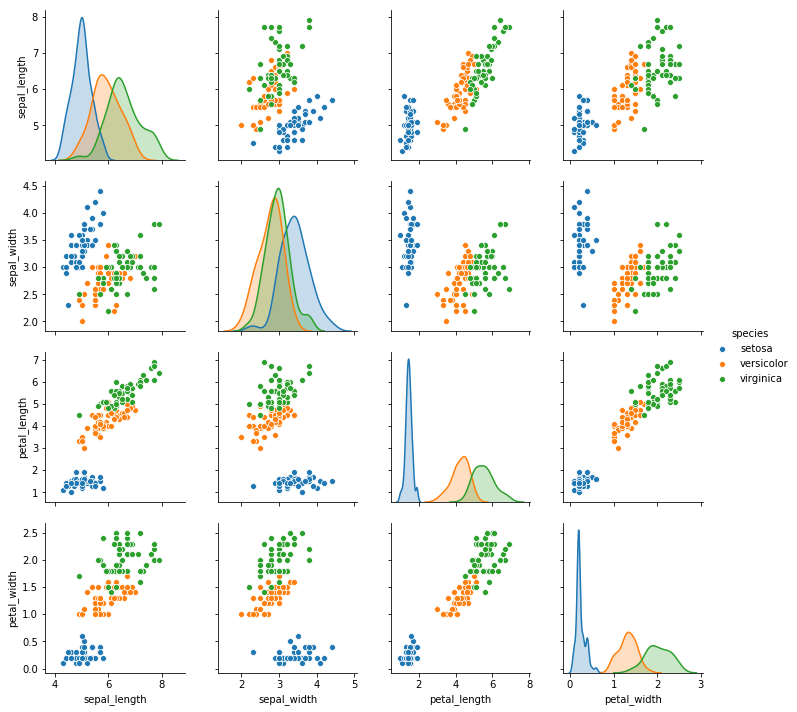

In [7]:
sns.pairplot(iris, hue='species')

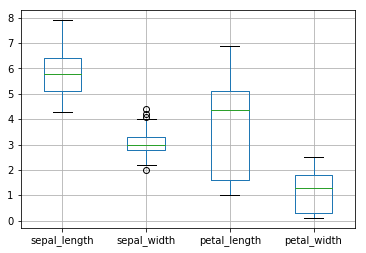

In [12]:
iris.boxplot()

---

In [47]:
iris.species = iris.species.map({'setosa':0, 'virginica':1, 'versicolor':2})

In [48]:
iris.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()

In [54]:
#1번 방법
iris[iris.columns[:-1]]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [60]:
#2번 방법
iris.iloc[:,:-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [56]:
#타겟
iris['species']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
128    1
129    1
130    1
131    1
132    1
133    1
134    1
135    1
136    1
137    1
138    1
139    1
140    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

In [58]:
#행렬인 학습데이터는 대문자, 백터인 타겟은 소문자
knn.fit(iris[iris.columns[:-1]], iris.species) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

---

### - 데이터 분리하기 
    - 모델의 성능을 알기 위해서 학습용, 테스트용으로 나눈다.

In [63]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(iris[iris.columns[:-1]],iris.species)

In [88]:
knn.fit(X_train,y_train) #학습용 데이트로 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [89]:
knn.predict(X_test)

array([0, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2])

In [90]:
y_test.values

array([0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2])

In [91]:
knn.predict(X_test) == y_test.values

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

- 더 편하게 
    - 평가척도에 따라서

In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
confusion_matrix(y_test, knn.predict(X_test))

array([[ 9,  0,  0],
       [ 0, 15,  3],
       [ 0,  1, 10]])

### - 회귀 모델

In [9]:
mpg = sns.load_dataset('mpg')

In [11]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [33]:
mpg.name.value_counts() # name은 대표성을 띄지않기 때문에 없이 예측한다.

ford pinto                      6
amc matador                     5
toyota corolla                  5
ford maverick                   5
peugeot 504                     4
chevrolet chevette              4
amc hornet                      4
chevrolet impala                4
toyota corona                   4
amc gremlin                     4
honda civic                     3
chevrolet caprice classic       3
ford gran torino                3
volkswagen dasher               3
chevrolet vega                  3
dodge colt                      3
plymouth duster                 3
pontiac catalina                3
chevrolet citation              3
plymouth fury iii               3
ford galaxie 500                3
chevrolet nova                  3
audi 100ls                      2
datsun pl510                    2
datsun 210                      2
opel 1900                       2
amc matador (sw)                2
amc concord                     2
buick estate wagon (sw)         2
ford ltd      

In [34]:
mpg.name.nunique()

305

In [35]:
mpg.origin.value_counts()  #가지수가 적기 떄문에 대표성을 띈다고 할 수 있다.

usa       249
japan      79
europe     70
Name: origin, dtype: int64

#### - missing data 찾기
        - missing data는 없애거나 대치시켜야한다.

In [16]:
mpg.horsepower[mpg.horsepower.isnull()] #.isnull==.isna

32    NaN
126   NaN
330   NaN
336   NaN
354   NaN
374   NaN
Name: horsepower, dtype: float64

In [19]:
!pip install missingno -q -U

In [20]:
import missingno as mino

In [23]:
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

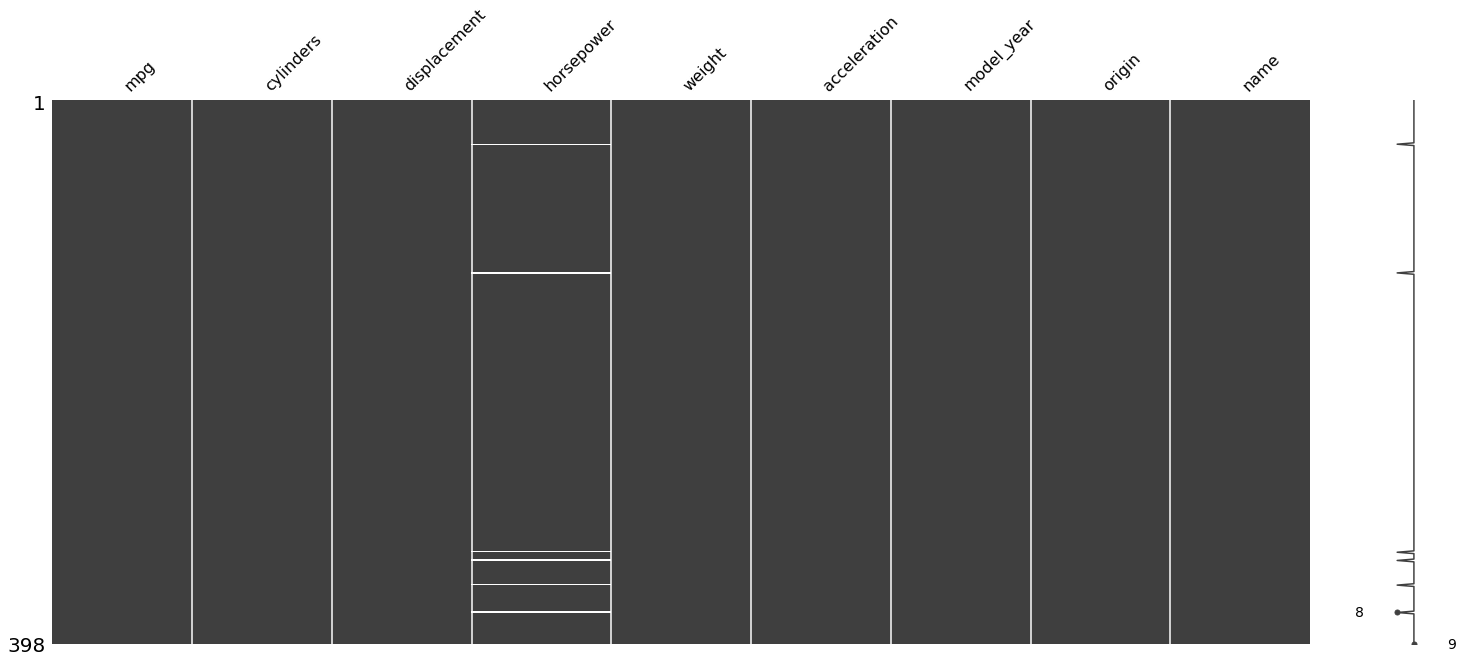

In [30]:
mino.matrix(mpg)

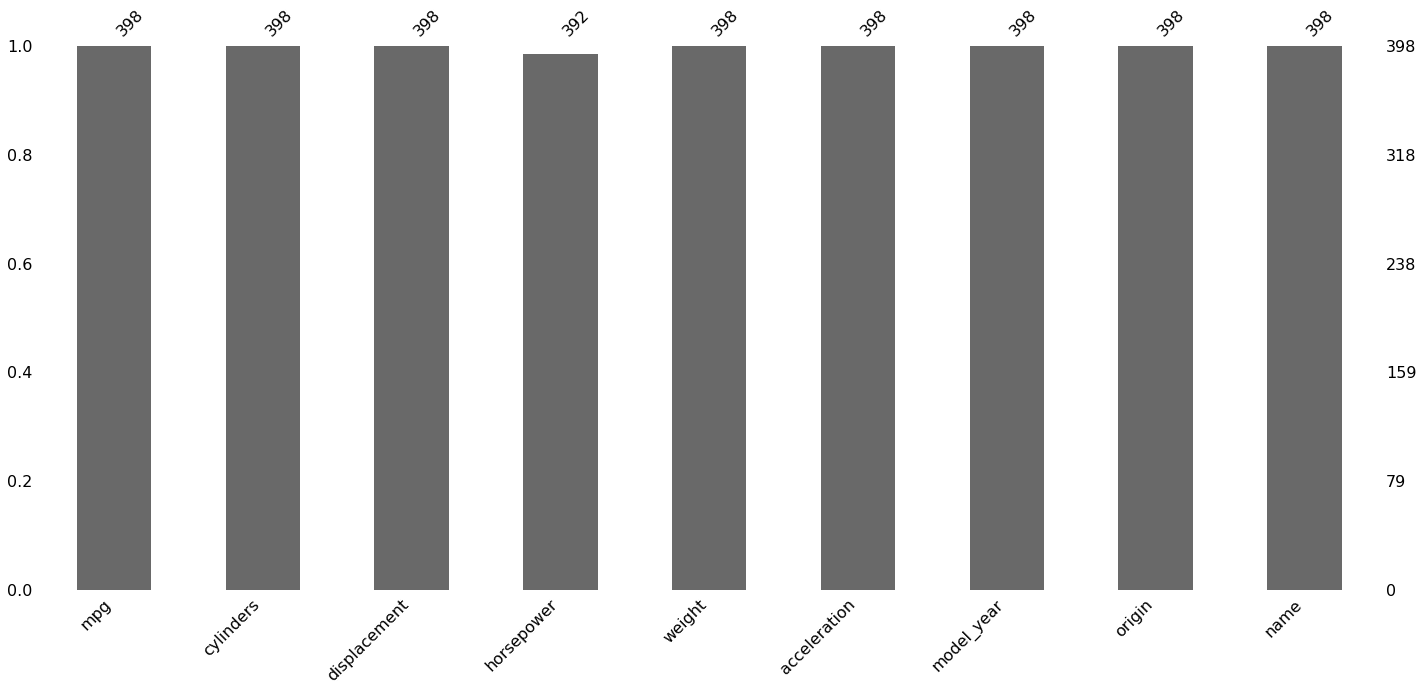

In [32]:
mino.bar(mpg)

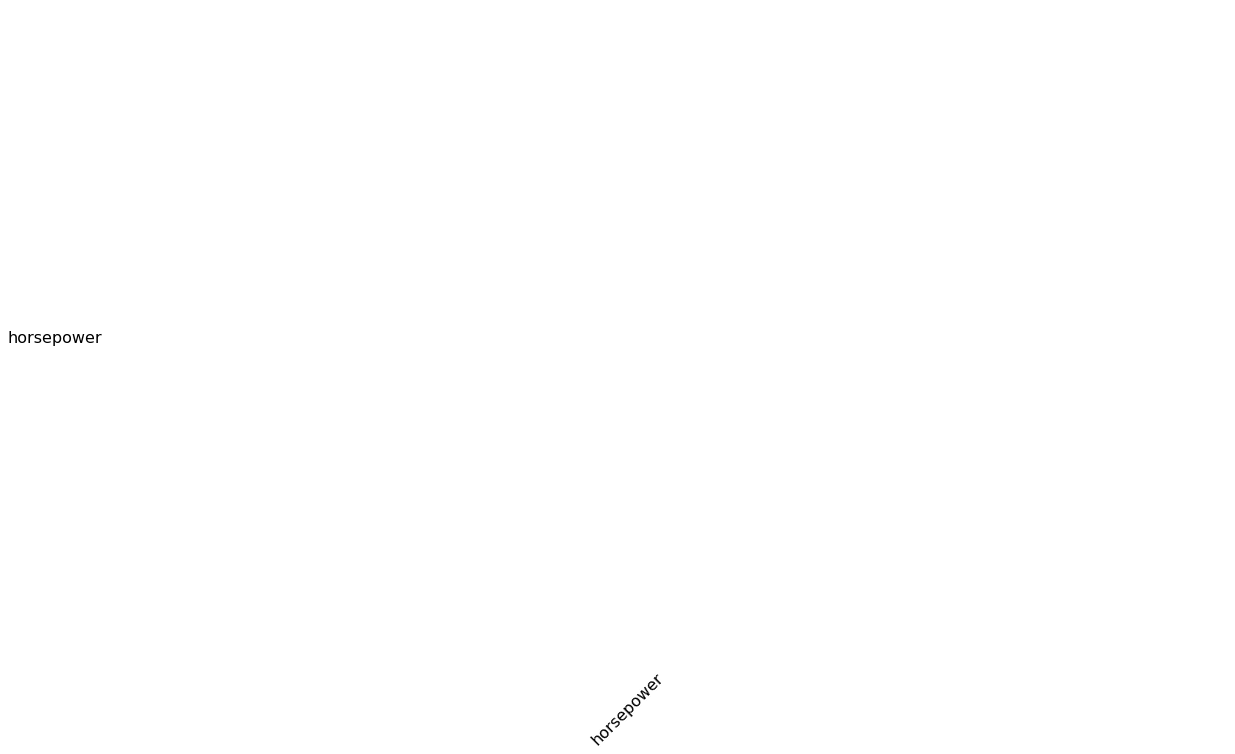

In [31]:
mino.heatmap(mpg)  #잘 그려지지않는 경우가 존재한다.